In [ ]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
path_inception = f"{getcwd()}/../content/drive/My Drive/TransferLearningModels/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top  = False,
                               weights      = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
      layer.trainable = False

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation = 'sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
#Getting the dataset from the drive
path_dataset = f"{getcwd()}/../content/drive/My Drive/Datasets/Fruits.zip"

In [ ]:
#UnZipping the File
from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

#Defining dataset path and finding number of files
import os 
Apple = os.path.join('../content/Fruits/Apple')
Banana = os.path.join('../content/Fruits/Banana')
print('Total Apple Images:',len(os.listdir(Apple)))
print('Total Banana Images:',len(os.listdir(Banana)))

Done
Total Apple Images: 492
Total Banana Images: 490


In [ ]:
#List of Apple and Banana Images
Apple_files = os.listdir(Apple)
print(Apple_files[:10])
Banana_files = os.listdir(Banana)
print(Banana_files[:10])

['295_100.jpg', 'r_219_100.jpg', 'r_201_100.jpg', 'r_173_100.jpg', '252_100.jpg', '254_100.jpg', 'r_193_100.jpg', 'r_238_100.jpg', 'r_300_100.jpg', 'r_170_100.jpg']
['r_219_100.jpg', 'r_201_100.jpg', 'r_93_100.jpg', 'r_173_100.jpg', '252_100.jpg', '254_100.jpg', 'r_193_100.jpg', 'r_300_100.jpg', 'r_170_100.jpg', 'r_121_100.jpg']


In [ ]:
#Train-Test Partitioning
from glob import glob
import os.path
from shutil import copy2

path = '../content/Fruits'
test = '../content/Test'
train = '../content/Train'

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)
 
for folder in glob(path+'/*'):
		print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[3]+'/'
		folder_train = train+'/'+folder.split('/')[3]+'/'
		# print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		# iterate from 0..test and copy to test
		# iterate test to end and copy to train
		for idx, im in enumerate(glob(folder+'/*')):
			#print(im)
			if idx <= train_num:
			# copy to test
				copy2(im, folder_train)
			else:
			# copy to train
				copy2(im, folder_test)

../content/Fruits/Apple
no of images in this folder: 492
../content/Fruits/Banana
no of images in this folder: 490


In [ ]:
# Define our example directories and files
train_dir = '/content/Train'
validation_dir = '/content/Test'

train_apple_dir = os.path.join(train_dir,'Apple')
train_banana_dir = os.path.join(train_dir,'Banana')
validation_apple_dir = os.path.join(validation_dir,'Apple')
validation_banana_dir = os.path.join(validation_dir,'Banana')

train_apple_fnames = os.listdir(train_apple_dir)
train_banana_fnames = os.listdir(train_banana_dir)
validation_apple_fnames = os.listdir(validation_apple_dir)
validation_banana_fnames = os.listdir(validation_banana_dir)

print(len(train_apple_fnames))
print(len(train_banana_fnames))
print(len(validation_apple_fnames))
print(len(validation_banana_fnames))

#Expected Output:
#394
#393
#98
#97

394
393
98
97


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')

# Expected Output:
# Found 787 images belonging to 2 classes.
# Found 195 images belonging to 2 classes.

Found 787 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.0%
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True 

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99% accuracy

callbacks = myCallback()
history = model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch = 10,
                             epochs = 3,
                             validation_steps = 10,
                             verbose = 1,
                             callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
10/10 [==============================] - 14s 1s/step - loss: 0.1534 - acc: 0.9144 - val_loss: 5.3894e-04 - val_acc: 1.0000
Epoch 2/3
10/10 [==============================] - ETA: 0s - loss: 0.0076 - acc: 0.9950
Reached 99.0% accuracy so cancelling training!
10/10 [==============================] - 14s 1s/step - loss: 0.0076 - acc: 0.9950 - val_loss: 2.5142e-04 - val_acc: 1.0000


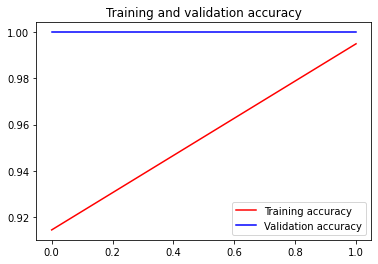

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()